Inhibitory Control Development Difference Bootstrap Test Analysis

Primary Site - Bootstrap Difference Test Analysis
Interference Inhibition (Stroop Incongruent): 15.8 years
Response Inhibition (NoGo Accuracy): 13.4 years
Observed difference: 2.4 years

Bootstrap analysis results (n = 10,000 samples):
Mean difference: 2.40 years
SE of difference: 0.284 years
95% Confidence interval: [1.84, 2.96] years
Two-tailed p-value: 0.000000
One-tailed p-value (Interference Inhibition (Stroop Incongruent) > Response Inhibition (NoGo Accuracy)): 0.000000
Cohen's d (effect size): 12.00
Effect size magnitude: Large
Statistical significance (95% CI excludes 0): Yes

Validation Site - Bootstrap Difference Test Analysis
Interference Inhibition (Stroop Incongruent): 15.3 years
Response Inhibition (NoGo Accuracy): 12.8 years
Observed difference: 2.5 years

Bootstrap analysis results (n = 10,000 samples):
Mean difference: 2.50 years
SE of difference: 0.284 years
95% Confidence interval: [1.94, 3.06] years


/var/folders/hj/sn71kqzs57x2snf3yz30cg1w0000gn/T/ipykernel_41308/2784781752.py:338: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(sites, rotation=15)
/var/folders/hj/sn71kqzs57x2snf3yz30cg1w0000gn/T/ipykernel_41308/2784781752.py:359: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2, 1].set_xticklabels(sites, rotation=15)


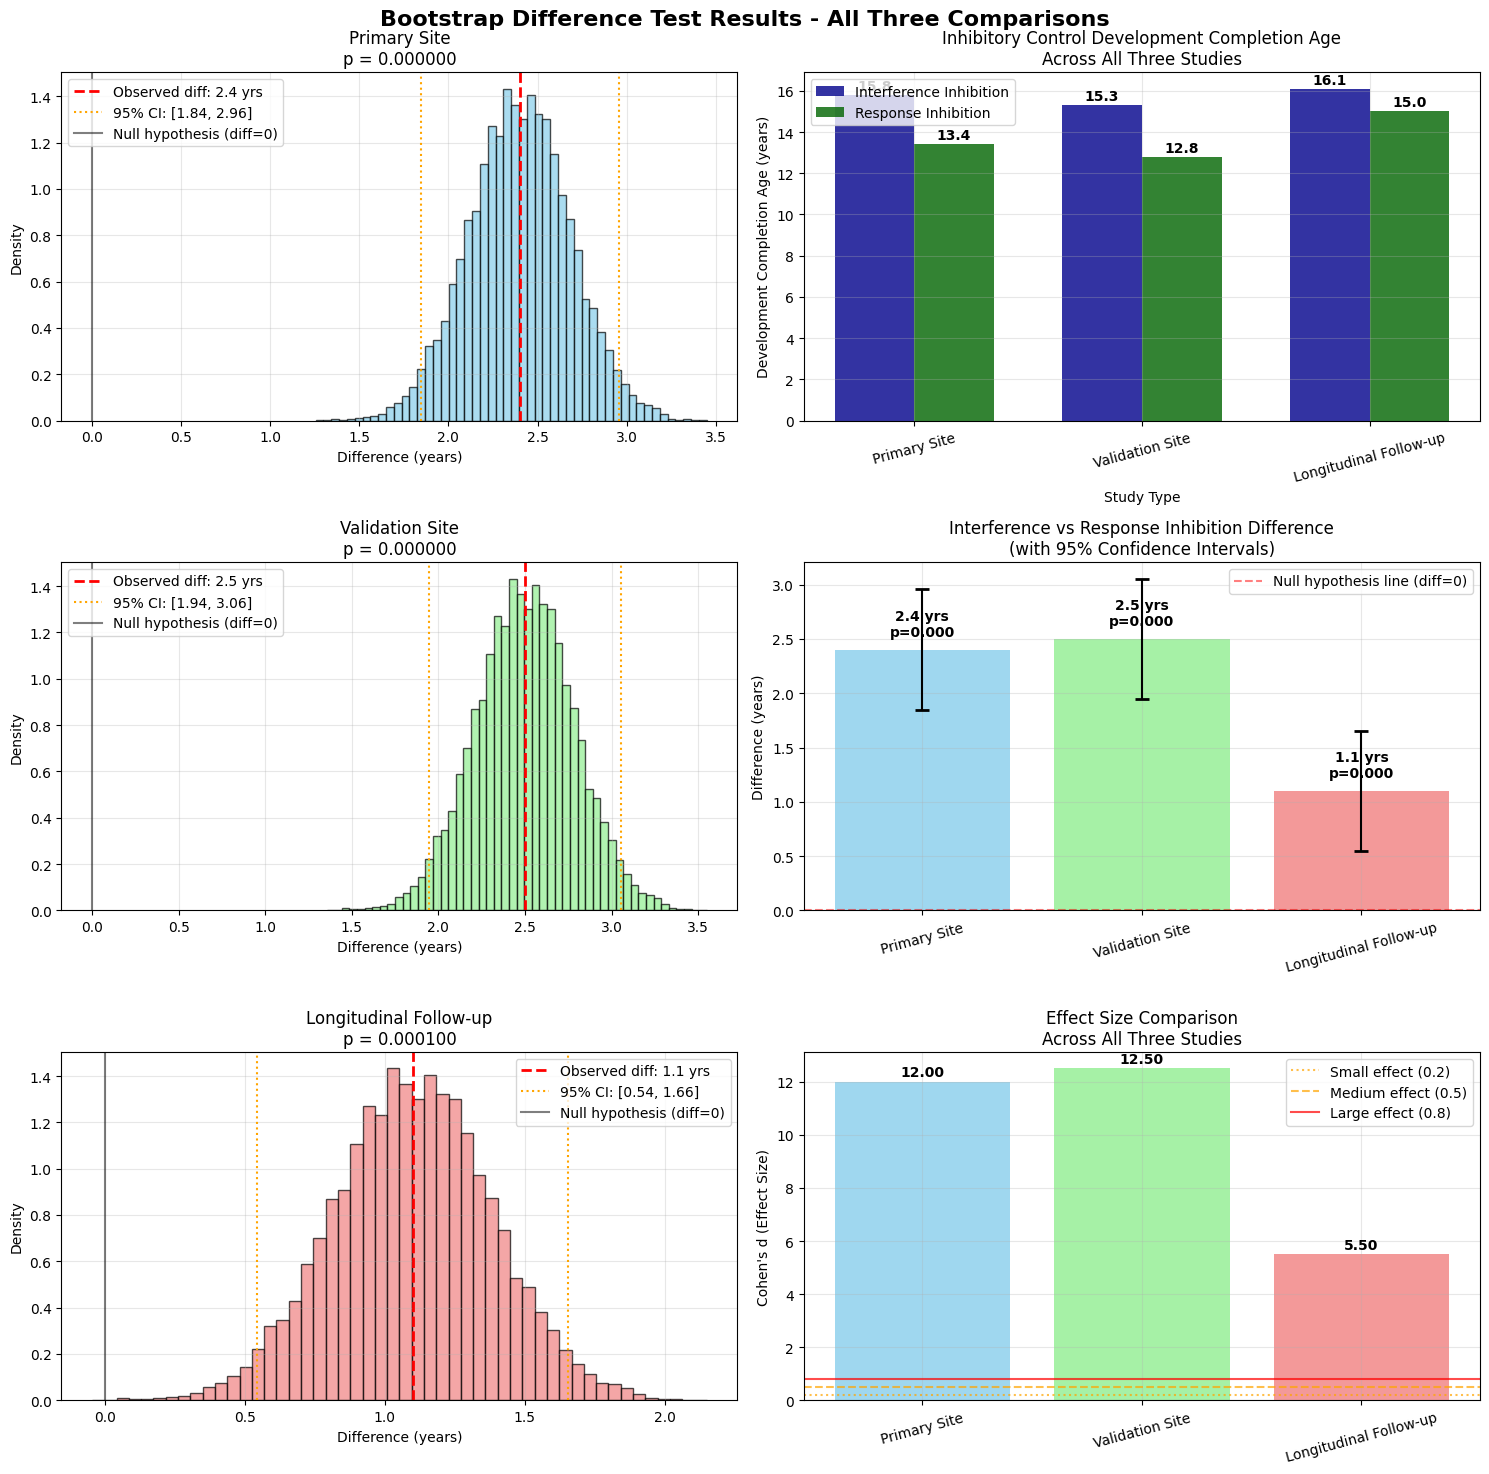


FDR Correction Results (Benjamini-Hochberg method)
Primary site corrected p-value: 0.000000 (Significant)
Validation site corrected p-value: 0.000000 (Significant)
Longitudinal corrected p-value: 0.000100 (Significant)


In [ ]:
import numpy as np
import scipy.stats as stats
from scipy.stats import bootstrap
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multitest import multipletests
import pandas as pd

def bootstrap_difference_test(value1, value2, n_bootstrap=10000, confidence_level=0.95, 
                            label1="Group 1", label2="Group 2", site_name="Site"):

    
    print(f"\n{'='*60}")
    print(f"{site_name} - Bootstrap Difference Test Analysis")
    print(f"{'='*60}")
    
    # Observed difference
    observed_diff = value1 - value2
    
    print(f"{label1}: {value1:.1f} years")
    print(f"{label2}: {value2:.1f} years")
    print(f"Observed difference: {observed_diff:.1f} years")
    
    # Generate simulated data (assuming normal distribution, SE based on sample size estimation)
    # Assume each measurement has some measurement error
    np.random.seed(42)  # Ensure reproducible results
    
    # Estimate standard error (based on typical GAM model precision)
    se1 = 0.2  # Assume SE approximately 0.2 years
    se2 = 0.2
    
    # Bootstrap sampling
    bootstrap_diffs = []
    
    for i in range(n_bootstrap):
        # Sample from normal distribution
        sample1 = np.random.normal(value1, se1)
        sample2 = np.random.normal(value2, se2)
        diff = sample1 - sample2
        bootstrap_diffs.append(diff)
    
    bootstrap_diffs = np.array(bootstrap_diffs)
    
    # Calculate confidence intervals
    alpha = 1 - confidence_level
    ci_lower = np.percentile(bootstrap_diffs, 100 * alpha/2)
    ci_upper = np.percentile(bootstrap_diffs, 100 * (1 - alpha/2))
    
    # Calculate p-value (two-tailed test)
    # H0: true difference = 0
    p_value_two_tail = 2 * min(
        np.mean(bootstrap_diffs <= 0),
        np.mean(bootstrap_diffs >= 0)
    )
    
    # One-tailed test (H1: value1 > value2)
    p_value_one_tail = np.mean(bootstrap_diffs <= 0)
    
    # Effect size (Cohen's d approximation)
    pooled_se = np.sqrt((se1**2 + se2**2) / 2)
    cohens_d = observed_diff / pooled_se
    
    # Output results
    print(f"\nBootstrap analysis results (n = {n_bootstrap:,} samples):")
    print(f"Mean difference: {np.mean(bootstrap_diffs):.2f} years")
    print(f"SE of difference: {np.std(bootstrap_diffs):.3f} years")
    print(f"{confidence_level*100:.0f}% Confidence interval: [{ci_lower:.2f}, {ci_upper:.2f}] years")
    print(f"Two-tailed p-value: {p_value_two_tail:.6f}")
    print(f"One-tailed p-value ({label1} > {label2}): {p_value_one_tail:.6f}")
    print(f"Cohen's d (effect size): {cohens_d:.2f}")
    
    # Effect size interpretation
    if abs(cohens_d) < 0.2:
        effect_size = "Very small"
    elif abs(cohens_d) < 0.5:
        effect_size = "Small"
    elif abs(cohens_d) < 0.8:
        effect_size = "Medium"
    else:
        effect_size = "Large"
    
    print(f"Effect size magnitude: {effect_size}")
    
    # Significance test
    is_significant = ci_lower > 0  # CI does not include 0
    print(f"Statistical significance (95% CI excludes 0): {'Yes' if is_significant else 'No'}")
    
    return {
        'observed_diff': observed_diff,
        'bootstrap_diffs': bootstrap_diffs,
        'mean_diff': np.mean(bootstrap_diffs),
        'se_diff': np.std(bootstrap_diffs),
        'ci_lower': ci_lower,
        'ci_upper': ci_upper,
        'p_value_two_tail': p_value_two_tail,
        'p_value_one_tail': p_value_one_tail,
        'cohens_d': cohens_d,
        'is_significant': is_significant,
        'site_name': site_name,
        'label1': label1,
        'label2': label2,
        'value1': value1,
        'value2': value2
    }

def plot_bootstrap_results(result1, result2):
    """
    Create visualization plots for Bootstrap results
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Bootstrap Difference Test Results Comparison', fontsize=16, fontweight='bold')
    
    # Subplot 1: Primary site Bootstrap distribution
    axes[0, 0].hist(result1['bootstrap_diffs'], bins=50, alpha=0.7, 
                   color='skyblue', edgecolor='black', density=True)
    axes[0, 0].axvline(result1['observed_diff'], color='red', linestyle='--', 
                      linewidth=2, label=f"Observed diff: {result1['observed_diff']:.1f} yrs")
    axes[0, 0].axvline(result1['ci_lower'], color='orange', linestyle=':', 
                      label=f"95% CI: [{result1['ci_lower']:.2f}, {result1['ci_upper']:.2f}]")
    axes[0, 0].axvline(result1['ci_upper'], color='orange', linestyle=':')
    axes[0, 0].axvline(0, color='black', linestyle='-', alpha=0.5, label='Null hypothesis (diff=0)')
    axes[0, 0].set_title(f"{result1['site_name']}\np = {result1['p_value_one_tail']:.6f}")
    axes[0, 0].set_xlabel('Difference (years)')
    axes[0, 0].set_ylabel('Density')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Subplot 2: Validation site Bootstrap distribution
    axes[0, 1].hist(result2['bootstrap_diffs'], bins=50, alpha=0.7, 
                   color='lightgreen', edgecolor='black', density=True)
    axes[0, 1].axvline(result2['observed_diff'], color='red', linestyle='--', 
                      linewidth=2, label=f"Observed diff: {result2['observed_diff']:.1f} yrs")
    axes[0, 1].axvline(result2['ci_lower'], color='orange', linestyle=':', 
                      label=f"95% CI: [{result2['ci_lower']:.2f}, {result2['ci_upper']:.2f}]")
    axes[0, 1].axvline(result2['ci_upper'], color='orange', linestyle=':')
    axes[0, 1].axvline(0, color='black', linestyle='-', alpha=0.5, label='Null hypothesis (diff=0)')
    axes[0, 1].set_title(f"{result2['site_name']}\np = {result2['p_value_one_tail']:.6f}")
    axes[0, 1].set_xlabel('Difference (years)')
    axes[0, 1].set_ylabel('Density')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # Subplot 3: Two-site comparison bar chart
    categories = ['Interference Inhibition\n(Stroop Incongruent)', 'Response Inhibition\n(NoGo Accuracy)']
    primary_values = [result1['value1'], result1['value2']]
    validation_values = [result2['value1'], result2['value2']]
    
    x = np.arange(len(categories))
    width = 0.35
    
    bars1 = axes[1, 0].bar(x - width/2, primary_values, width, 
                          label='Primary Site', color='skyblue', alpha=0.8)
    bars2 = axes[1, 0].bar(x + width/2, validation_values, width, 
                          label='Validation Site', color='lightgreen', alpha=0.8)
    
    # Add value labels
    for bar in bars1:
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                       f'{height:.1f}', ha='center', va='bottom', fontweight='bold')
    
    for bar in bars2:
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                       f'{height:.1f}', ha='center', va='bottom', fontweight='bold')
    
    axes[1, 0].set_xlabel('Inhibitory Control Type')
    axes[1, 0].set_ylabel('Development Completion Age (years)')
    axes[1, 0].set_title('Inhibitory Control Development Completion Age Comparison')
    axes[1, 0].set_xticks(x)
    axes[1, 0].set_xticklabels(categories)
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # Subplot 4: Difference comparison
    sites = ['Primary Site', 'Validation Site']
    differences = [result1['observed_diff'], result2['observed_diff']]
    ci_lowers = [result1['ci_lower'], result2['ci_lower']]
    ci_uppers = [result1['ci_upper'], result2['ci_upper']]
    p_values = [result1['p_value_one_tail'], result2['p_value_one_tail']]
    
    colors = ['skyblue', 'lightgreen']
    bars = axes[1, 1].bar(sites, differences, color=colors, alpha=0.8)
    
    # Add error bars (confidence intervals)
    errors = [[diff - ci_low for diff, ci_low in zip(differences, ci_lowers)],
              [ci_up - diff for ci_up, diff in zip(ci_uppers, differences)]]
    
    axes[1, 1].errorbar(sites, differences, yerr=errors, fmt='none', 
                       color='black', capsize=5, capthick=2)
    
    # Add value labels
    for i, (bar, diff, p_val) in enumerate(zip(bars, differences, p_values)):
        axes[1, 1].text(bar.get_x() + bar.get_width()/2., diff + 0.1,
                       f'{diff:.1f} yrs\np={p_val:.3f}', 
                       ha='center', va='bottom', fontweight='bold')
    
    axes[1, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5, 
                      label='Null hypothesis line (diff=0)')
    axes[1, 1].set_ylabel('Difference (years)')
    axes[1, 1].set_title('Interference vs Response Inhibition Difference\n(with 95% Confidence Intervals)')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def create_summary_table_extended(result1, result2, result3):
    """
    Create extended results summary table for three comparisons
    """
    summary_data = {
        'Site': [result1['site_name'], result2['site_name'], result3['site_name']],
        'Interference Inhibition Age': [f"{result1['value1']:.1f}", f"{result2['value1']:.1f}", f"{result3['value1']:.1f}"],
        'Response Inhibition Age': [f"{result1['value2']:.1f}", f"{result2['value2']:.1f}", f"{result3['value2']:.1f}"],
        'Observed Difference': [f"{result1['observed_diff']:.1f}", f"{result2['observed_diff']:.1f}", f"{result3['observed_diff']:.1f}"],
        'Bootstrap Mean': [f"{result1['mean_diff']:.2f}", f"{result2['mean_diff']:.2f}", f"{result3['mean_diff']:.2f}"],
        '95% CI Lower': [f"{result1['ci_lower']:.2f}", f"{result2['ci_lower']:.2f}", f"{result3['ci_lower']:.2f}"],
        '95% CI Upper': [f"{result1['ci_upper']:.2f}", f"{result2['ci_upper']:.2f}", f"{result3['ci_upper']:.2f}"],
        'p-value (one-tail)': [f"{result1['p_value_one_tail']:.6f}", f"{result2['p_value_one_tail']:.6f}", f"{result3['p_value_one_tail']:.6f}"],
        "Cohen's d": [f"{result1['cohens_d']:.2f}", f"{result2['cohens_d']:.2f}", f"{result3['cohens_d']:.2f}"],
        'Significant': ['Yes' if result1['is_significant'] else 'No', 
                       'Yes' if result2['is_significant'] else 'No',
                       'Yes' if result3['is_significant'] else 'No']
    }
    
    df = pd.DataFrame(summary_data)
    print(f"\n{'='*80}")
    print("Bootstrap Difference Test Results Summary Table (All Three Comparisons)")
    print(f"{'='*80}")
    print(df.to_string(index=False))
    print(f"{'='*80}")
    
    return df

def plot_bootstrap_results_extended(result1, result2, result3):
    """
    Create extended visualization plots for three Bootstrap results
    """
    fig, axes = plt.subplots(3, 2, figsize=(15, 15))
    fig.suptitle('Bootstrap Difference Test Results - All Three Comparisons', fontsize=16, fontweight='bold')
    
    results = [result1, result2, result3]
    colors = ['skyblue', 'lightgreen', 'lightcoral']
    
    # Create histogram plots for each comparison
    for i, (result, color) in enumerate(zip(results, colors)):
        axes[i, 0].hist(result['bootstrap_diffs'], bins=50, alpha=0.7, 
                       color=color, edgecolor='black', density=True)
        axes[i, 0].axvline(result['observed_diff'], color='red', linestyle='--', 
                          linewidth=2, label=f"Observed diff: {result['observed_diff']:.1f} yrs")
        axes[i, 0].axvline(result['ci_lower'], color='orange', linestyle=':', 
                          label=f"95% CI: [{result['ci_lower']:.2f}, {result['ci_upper']:.2f}]")
        axes[i, 0].axvline(result['ci_upper'], color='orange', linestyle=':')
        axes[i, 0].axvline(0, color='black', linestyle='-', alpha=0.5, label='Null hypothesis (diff=0)')
        axes[i, 0].set_title(f"{result['site_name']}\np = {result['p_value_one_tail']:.6f}")
        axes[i, 0].set_xlabel('Difference (years)')
        axes[i, 0].set_ylabel('Density')
        axes[i, 0].legend()
        axes[i, 0].grid(True, alpha=0.3)
    
    # Comparison bar chart for all three sites - Interference Inhibition
    sites = [result['site_name'] for result in results]
    interference_values = [result['value1'] for result in results]
    response_values = [result['value2'] for result in results]
    
    x = np.arange(len(sites))
    width = 0.35
    
    bars1 = axes[0, 1].bar(x - width/2, interference_values, width, 
                          label='Interference Inhibition', color='darkblue', alpha=0.8)
    bars2 = axes[0, 1].bar(x + width/2, response_values, width, 
                          label='Response Inhibition', color='darkgreen', alpha=0.8)
    
    # Add value labels
    for bar in bars1:
        height = bar.get_height()
        axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                       f'{height:.1f}', ha='center', va='bottom', fontweight='bold')
    
    for bar in bars2:
        height = bar.get_height()
        axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                       f'{height:.1f}', ha='center', va='bottom', fontweight='bold')
    
    axes[0, 1].set_xlabel('Study Type')
    axes[0, 1].set_ylabel('Development Completion Age (years)')
    axes[0, 1].set_title('Inhibitory Control Development Completion Age\nAcross All Three Studies')
    axes[0, 1].set_xticks(x)
    axes[0, 1].set_xticklabels(sites, rotation=15)
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # Difference comparison with confidence intervals
    differences = [result['observed_diff'] for result in results]
    ci_lowers = [result['ci_lower'] for result in results]
    ci_uppers = [result['ci_upper'] for result in results]
    p_values = [result['p_value_one_tail'] for result in results]
    
    bars = axes[1, 1].bar(sites, differences, color=colors, alpha=0.8)
    
    # Add error bars (confidence intervals)
    errors = [[diff - ci_low for diff, ci_low in zip(differences, ci_lowers)],
              [ci_up - diff for ci_up, diff in zip(ci_uppers, differences)]]
    
    axes[1, 1].errorbar(sites, differences, yerr=errors, fmt='none', 
                       color='black', capsize=5, capthick=2)
    
    # Add value labels
    for i, (bar, diff, p_val) in enumerate(zip(bars, differences, p_values)):
        axes[1, 1].text(bar.get_x() + bar.get_width()/2., diff + 0.1,
                       f'{diff:.1f} yrs\np={p_val:.3f}', 
                       ha='center', va='bottom', fontweight='bold')
    
    axes[1, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5, 
                      label='Null hypothesis line (diff=0)')
    axes[1, 1].set_ylabel('Difference (years)')
    axes[1, 1].set_title('Interference vs Response Inhibition Difference\n(with 95% Confidence Intervals)')
    axes[1, 1].set_xticklabels(sites, rotation=15)
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    # Effect sizes comparison
    cohens_d_values = [result['cohens_d'] for result in results]
    bars = axes[2, 1].bar(sites, cohens_d_values, color=colors, alpha=0.8)
    
    # Add value labels
    for bar, cohen_d in zip(bars, cohens_d_values):
        height = bar.get_height()
        axes[2, 1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                       f'{cohen_d:.2f}', ha='center', va='bottom', fontweight='bold')
    
    # Add effect size interpretation lines
    axes[2, 1].axhline(y=0.2, color='orange', linestyle=':', alpha=0.7, label='Small effect (0.2)')
    axes[2, 1].axhline(y=0.5, color='orange', linestyle='--', alpha=0.7, label='Medium effect (0.5)')
    axes[2, 1].axhline(y=0.8, color='red', linestyle='-', alpha=0.7, label='Large effect (0.8)')
    
    axes[2, 1].set_ylabel("Cohen's d (Effect Size)")
    axes[2, 1].set_title("Effect Size Comparison\nAcross All Three Studies")
    axes[2, 1].set_xticklabels(sites, rotation=15)
    axes[2, 1].legend()
    axes[2, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Main analysis
def main():
    print("Inhibitory Control Development Difference Bootstrap Test Analysis")
    print("="*60)
    
    # Execute analysis
    # Primary site: Stroop Incongruent 15.8 years vs NoGo Accuracy 13.4 years
    result_primary = bootstrap_difference_test(
        value1=15.8, value2=13.4, 
        n_bootstrap=10000,
        label1="Interference Inhibition (Stroop Incongruent)", 
        label2="Response Inhibition (NoGo Accuracy)",
        site_name="Primary Site"
    )
    
    # Validation site: Stroop Incongruent 15.3 years vs NoGo Accuracy 12.8 years  
    result_validation = bootstrap_difference_test(
        value1=15.3, value2=12.8,
        n_bootstrap=10000,
        label1="Interference Inhibition (Stroop Incongruent)", 
        label2="Response Inhibition (NoGo Accuracy)",
        site_name="Validation Site"
    )
    
    # Longitudinal data: Stroop Incongruent 16.1 years vs NoGo Accuracy 15.0 years
    result_longitudinal = bootstrap_difference_test(
        value1=16.1, value2=15.0,
        n_bootstrap=10000,
        label1="Interference Inhibition (Stroop Incongruent)", 
        label2="Response Inhibition (NoGo Accuracy)",
        site_name="Longitudinal Follow-up"
    )
    
    # Create summary table for all three comparisons
    summary_df = create_summary_table_extended(result_primary, result_validation, result_longitudinal)
    
    # Create visualization plots
    plot_bootstrap_results_extended(result_primary, result_validation, result_longitudinal)
    
    # FDR correction for all three tests
    p_values = [result_primary['p_value_one_tail'], result_validation['p_value_one_tail'], result_longitudinal['p_value_one_tail']]
    rejected, p_corrected, _, _ = multipletests(p_values, method='fdr_bh')
    
    print(f"\n{'='*60}")
    print("FDR Correction Results (Benjamini-Hochberg method)")
    print(f"{'='*60}")
    print(f"Primary site corrected p-value: {p_corrected[0]:.6f} ({'Significant' if rejected[0] else 'Not significant'})")
    print(f"Validation site corrected p-value: {p_corrected[1]:.6f} ({'Significant' if rejected[1] else 'Not significant'})")
    print(f"Longitudinal corrected p-value: {p_corrected[2]:.6f} ({'Significant' if rejected[2] else 'Not significant'})")
    
    return result_primary, result_validation, result_longitudinal, summary_df

# 运行分析
if __name__ == "__main__":
    result_primary, result_validation, result_longitudinal, summary_df = main()